In [1]:
options(repr.plot.width=15, repr.plot.height=10)

In [3]:
library(plyr)
library(ggplot2)
library(corpcor)
library(evolqg)
library(tidyverse)
library(cowplot)
library(patchwork)
library(psych)
library(doMC)
registerDoMC(8)

In [6]:
Head_hsbm_s = read_csv("../data/output/SBM/clustering/head_weights-spearman_fdr-1e-04_mcmc_mode_hierarchical-SBM.csv")
Head_hsbm_s$X1 = NULL
Head_hsbm_s$tissue = "head"
Head_hsbm_s$mode = "signed"

Head_hsbm_un = read_csv("../data/output/SBM/clustering/head_weights-spearman_fdr-1e-04_absolute_mcmc_mode_hierarchical-SBM.csv")
Head_hsbm_un$X1 = NULL
Head_hsbm_un$tissue = "head"
Head_hsbm_un$mode = "unsigned"

Head_hsbm = rbind(Head_hsbm_s, Head_hsbm_un)
Head_hsbm

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Gene = col_character(),
  Degree = col_double(),
  E_corr = col_double(),
  B1 = col_double(),
  B2 = col_double(),
  B3 = col_double(),
  B4 = col_double(),
  B5 = col_double(),
  B6 = col_double(),
  B7 = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Gene,Degree,E_corr,B1,B2,B3,B4,B5,B6,B7,tissue,mode
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
FBgn0031081,1,0.3449202,0,0,0,0,0,0,0,head,signed
FBgn0024733,472,0.4440652,1,1,1,1,1,1,1,head,signed
FBgn0023537,425,0.3979997,2,2,2,1,1,1,1,head,signed
FBgn0000108,287,0.3752042,3,0,0,0,0,0,0,head,signed
FBgn0025640,1,0.3245821,4,3,3,0,0,0,0,head,signed
FBgn0025638,3,0.3181666,5,4,3,0,0,0,0,head,signed
FBgn0040383,3,0.3570185,6,5,1,1,1,1,1,head,signed
FBgn0040382,4,0.3201840,7,0,0,0,0,0,0,head,signed
FBgn0015288,46,0.3437573,8,6,1,1,1,1,1,head,signed


In [25]:
Body_hsbm_s = read_csv("../data/output/SBM/clustering/body_weights-spearman_fdr-1e-05_mcmc_mode_hierarchical-SBM.csv")
Body_hsbm_s$X1 = NULL
Body_hsbm_s$tissue = "Body"
Body_hsbm_s$mode = "signed"

Body_hsbm_un = read_csv("../data/output/SBM/clustering/body_weights-spearman_fdr-1e-05_absolute_mcmc_mode_hierarchical-SBM.csv")
Body_hsbm_un$X1 = NULL
Body_hsbm_un$tissue = "Body"
Body_hsbm_un$mode = "unsigned"

Body_hsbm = rbind(Body_hsbm_s, Body_hsbm_un)
Body_hsbm

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Gene = col_character(),
  Degree = col_double(),
  E_corr = col_double(),
  B1 = col_double(),
  B2 = col_double(),
  B3 = col_double(),
  B4 = col_double(),
  B5 = col_double(),
  B6 = col_double(),
  B7 = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Gene,Degree,E_corr,B1,B2,B3,B4,B5,B6,B7,tissue,mode
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
FBgn0052350,1,0.3265576,0,0,0,2,0,0,0,Body,signed
FBgn0024733,829,0.4394446,1,1,1,1,1,1,1,Body,signed
FBgn0040372,388,0.3727761,2,2,0,2,0,0,0,Body,signed
FBgn0023537,61,0.3492017,3,3,2,2,0,0,0,Body,signed
FBgn0025640,12,0.3416718,3,3,2,2,0,0,0,Body,signed
FBgn0025635,6,0.3320026,0,0,0,2,0,0,0,Body,signed
FBgn0003575,2,0.3525469,0,0,0,2,0,0,0,Body,signed
FBgn0025638,23,0.3397039,4,4,2,2,0,0,0,Body,signed
FBgn0040383,29,0.3464257,5,5,2,2,0,0,0,Body,signed


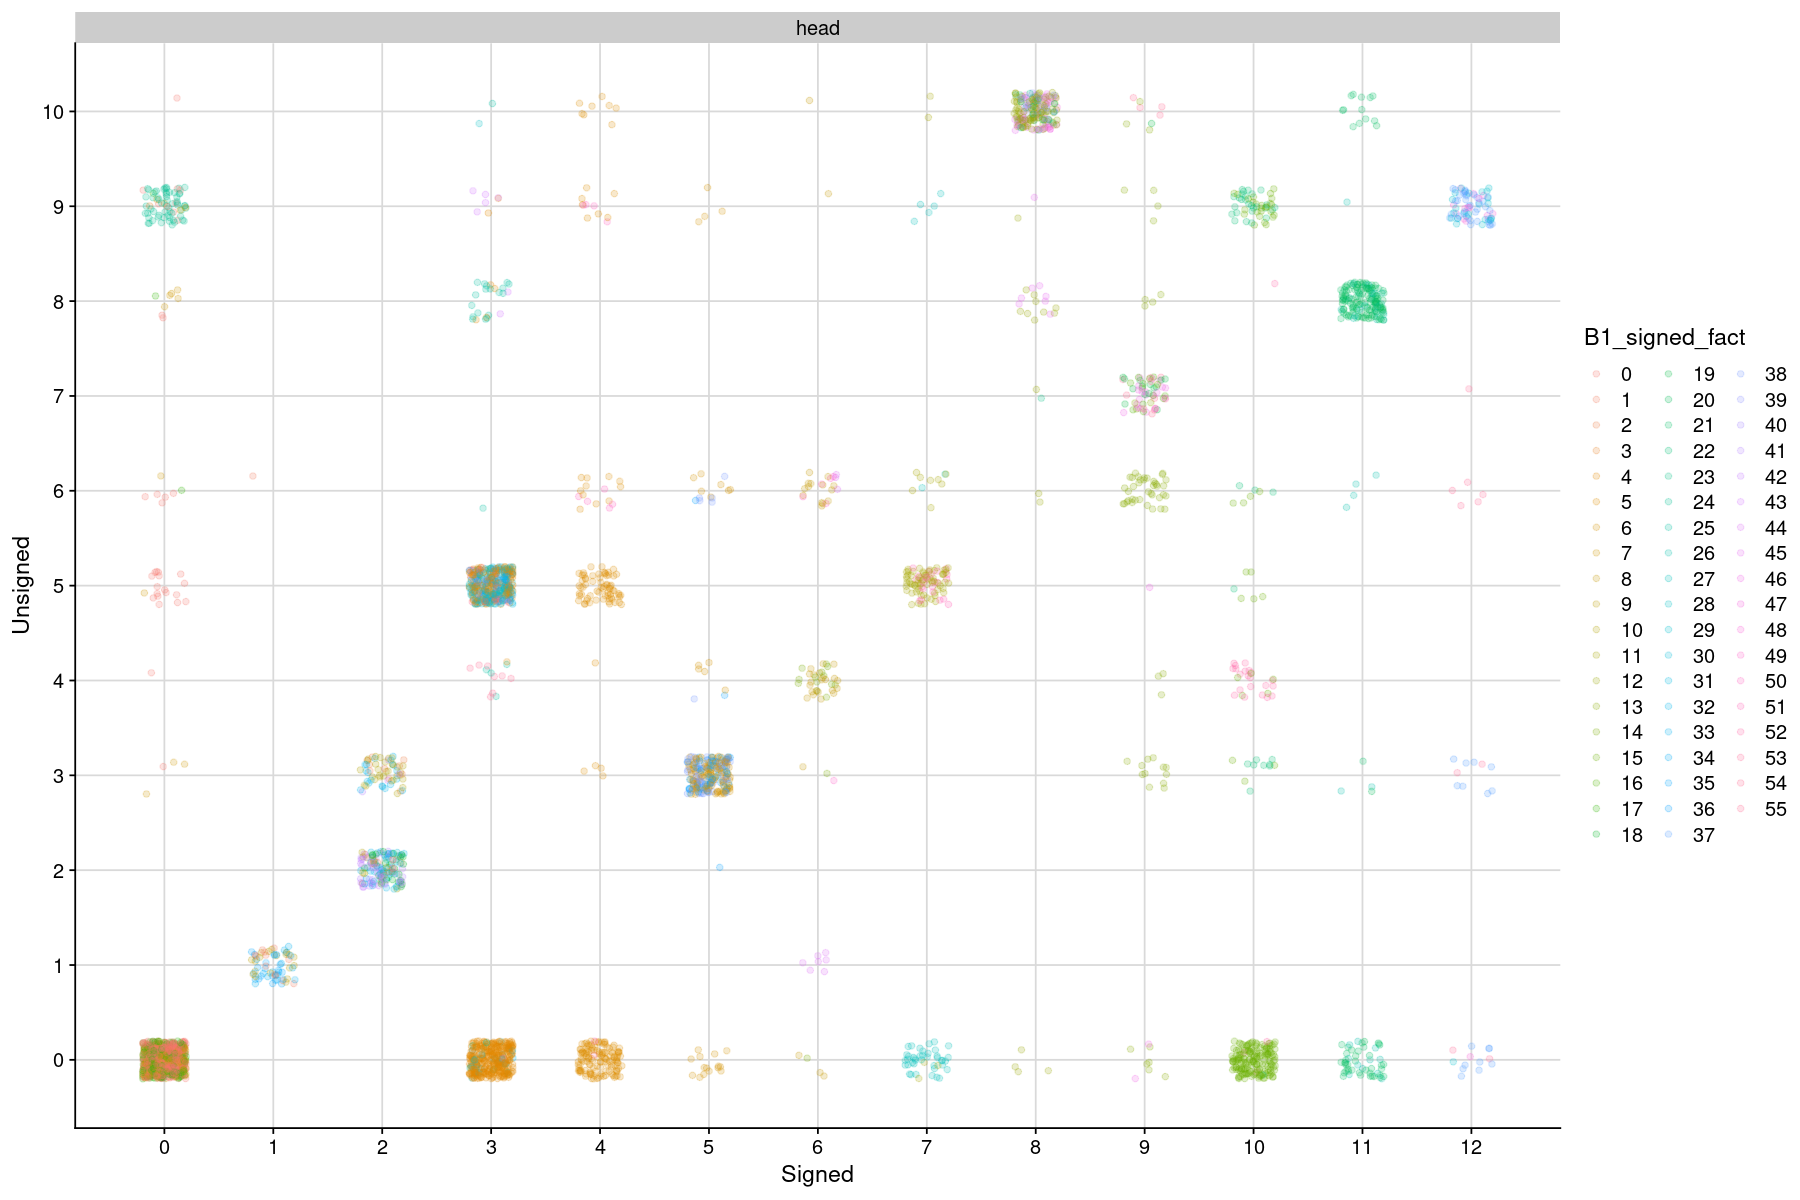

In [50]:
Head_hsbm %>%
    pivot_wider(values_from = B1:B7, names_from = mode) %>%
    mutate(B1_signed_fact = factor(B1_signed)) %>%
    ggplot(aes(B2_signed, B2_unsigned, color = B1_signed_fact)) + 
    geom_jitter(width = 0.2, height = 0.2, alpha = 0.2) + facet_wrap(~tissue, scales = "free") + 
    scale_y_continuous(breaks = 0:60) + scale_x_continuous(breaks = 0:60) + 
    theme_cowplot() + background_grid() + labs(y = "Unsigned", x = "Signed")  
    #scale_color_discrete(name = "SBM Level 3") 
#save_plot("")

In [17]:
Head_hsbm %>% pivot_wider(value_from = B1:B7, names_from = mode)

Gene,Degree,E_corr,tissue,B1_signed,B1_unsigned,B2_signed,B2_unsigned,B3_signed,B3_unsigned,B4_signed,B4_unsigned,B5_signed,B5_unsigned,B6_signed,B6_unsigned,B7_signed,B7_unsigned
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FBgn0031081,1,0.3449202,head,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FBgn0024733,472,0.4440652,head,1,1,1,1,1,4,1,1,1,0,1,0,1,0
FBgn0023537,425,0.3979997,head,2,2,2,2,2,2,1,0,1,0,1,0,1,0
FBgn0000108,287,0.3752042,head,3,3,0,0,0,0,0,0,0,0,0,0,0,0
FBgn0025640,1,0.3245821,head,4,0,3,0,3,0,0,0,0,0,0,0,0,0
FBgn0025638,3,0.3181666,head,5,0,4,0,3,0,0,0,0,0,0,0,0,0
FBgn0040383,3,0.3570185,head,6,4,5,3,1,4,1,1,1,0,1,0,1,0
FBgn0040382,4,0.3201840,head,7,0,0,0,0,0,0,0,0,0,0,0,0,0
FBgn0015288,46,0.3437573,head,8,5,6,4,1,3,1,0,1,0,1,0,1,0


In [93]:
for(t in unique(WGCNA_HSBM$tissue)){
    fdr = c("body"= 5, "head"=4)
    out_dir = paste0("../data/output/SBM/clustering/", t, "_weights-spearman_fdr-1e-0", fdr[t],"_mcmc_mode_hierarchical-SBM_gene-blocks/WGCNA")
    if(dir.exists(out_dir)) {
        for(i in dir(out_dir, full.names = TRUE))
            file.remove(i)
    } else 
        dir.create(out_dir, recursive = T)
    WGCNA_HSBM_t = WGCNA_HSBM %>% filter(tissue == t)
    for(block in unique(WGCNA_HSBM_t$WGCNA)){
        WGCNA_HSBM_t %>%
            filter(WGCNA == block) %>%
            select(Gene) %>% 
            write_csv(file.path(out_dir, paste0("wgcna_", block, ".csv")), col_names = FALSE)     
    }
}
    